In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_preparation as dp
import source.modelling_utils as utils
import source.models_classification as modl


In [55]:
# simulate
df, _, _ = dp.simulate_hmm_equity_premium(
    n_samples=500,
    target="state_t_plus_1",  # forecast next state
    make_features=True,
    vol_windows=(20,60),
    mean_windows=(20,),
    start_date="1970-01-01",
    p_bull_to_bear = 0.12,  # lower -> more persistent bull
    p_bear_to_bull = 0.12,  # bear lasts shorter on avg
)

# choose features (you can add more)


In [53]:
df

,equity_premium,state_true,abs_ret,rv20,rv60,ma20,timestamp
1970-01-01,0.000881,1,0.000881,NaN,NaN,NaN,1970-01-01
1970-02-01,0.015189,1,0.015189,NaN,NaN,NaN,1970-02-01
1970-03-01,0.014790,1,0.014790,NaN,NaN,NaN,1970-03-01
1970-04-01,0.022105,1,0.022105,NaN,NaN,NaN,1970-04-01
1970-05-01,0.006191,1,0.006191,NaN,NaN,NaN,1970-05-01
...,...,...,...,...,...,...,...
2011-04-01,0.006012,0,0.006012,0.036256,0.033618,-0.009849,2011-04-01
2011-05-01,0.020178,1,0.020178,0.036610,0.033493,-0.009355,2011-05-01
2011-06-01,-0.050682,0,0.050682,0.036699,0.033939,-0.013214,2011-06-01
2011-07-01,0.016599,0,0.016599,0.035652,0.033698,-0.009462,2011-07-01


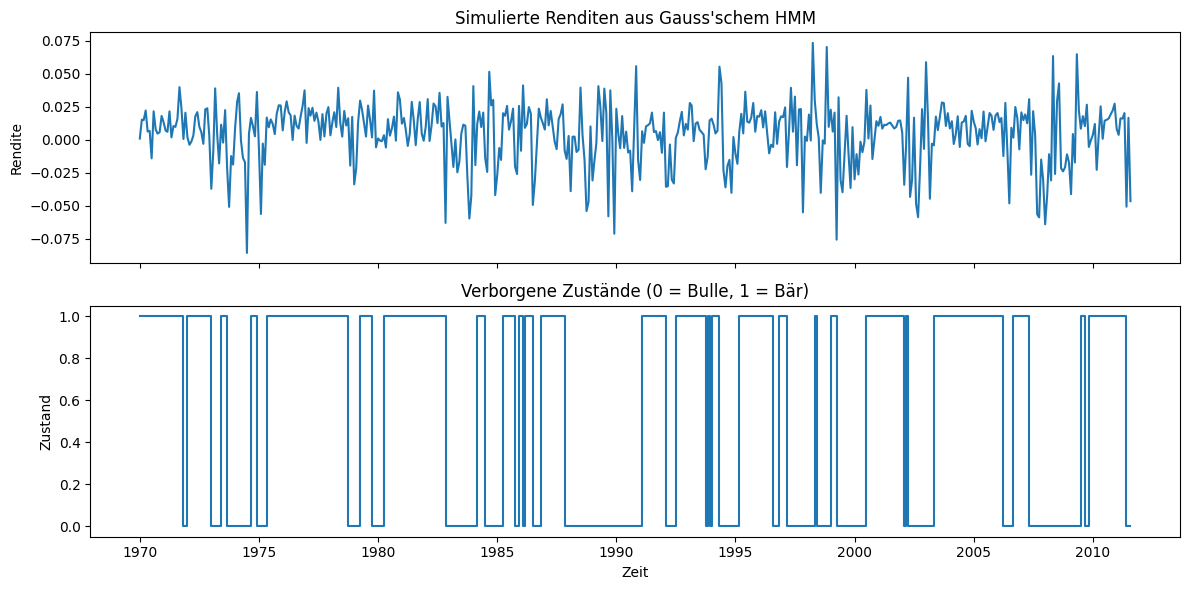

In [56]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# (1) Renditen
ax[0].plot(df["timestamp"], df["equity_premium"].values)
ax[0].set_title("Simulierte Renditen aus Gauss'schem HMM")
ax[0].set_ylabel("Rendite")

# (2) Hidden States (0 = Bulle, 1 = Bär)
ax[1].step(df["timestamp"], df["state_true"].values, where="post")
ax[1].set_title("Verborgene Zustände (0 = Bulle, 1 = Bär)")
ax[1].set_xlabel("Zeit")
ax[1].set_ylabel("Zustand")

plt.tight_layout()
plt.show()


In [57]:
logit_lag_fit_predict = modl.make_logit_multifeature_lag_fit_predict_fn(base_cols = ["equity_premium", "abs_ret", "rv20", "rv60", "ma20"],                # multiple continuous input variables
    target_col = "state_true",
    )
metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state_true",
    model_fit_predict_fn=logit_lag_fit_predict,
    start_oos="2007-01-01",
    start_date="1850-01-01",
    baseline_mode = 'majority'
)
print(metrics)

2007-01-01 00:00:00
2007-02-01 00:00:00
2007-03-01 00:00:00
2007-04-01 00:00:00
2007-05-01 00:00:00
2007-06-01 00:00:00
2007-07-01 00:00:00
2007-08-01 00:00:00
2007-09-01 00:00:00
2007-10-01 00:00:00
2007-11-01 00:00:00
2007-12-01 00:00:00
2008-01-01 00:00:00
2008-02-01 00:00:00
2008-03-01 00:00:00
2008-04-01 00:00:00
2008-05-01 00:00:00
2008-06-01 00:00:00
2008-07-01 00:00:00
2008-08-01 00:00:00
2008-09-01 00:00:00
2008-10-01 00:00:00
2008-11-01 00:00:00
2008-12-01 00:00:00
2009-01-01 00:00:00
2009-02-01 00:00:00
2009-03-01 00:00:00
2009-04-01 00:00:00
2009-05-01 00:00:00
2009-06-01 00:00:00
2009-07-01 00:00:00
2009-08-01 00:00:00
2009-09-01 00:00:00
2009-10-01 00:00:00
2009-11-01 00:00:00
2009-12-01 00:00:00
2010-01-01 00:00:00
2010-02-01 00:00:00
2010-03-01 00:00:00
2010-04-01 00:00:00
2010-05-01 00:00:00
2010-06-01 00:00:00
2010-07-01 00:00:00
2010-08-01 00:00:00
2010-09-01 00:00:00
2010-10-01 00:00:00
2010-11-01 00:00:00
2010-12-01 00:00:00
2011-01-01 00:00:00
2011-02-01 00:00:00


(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 25.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

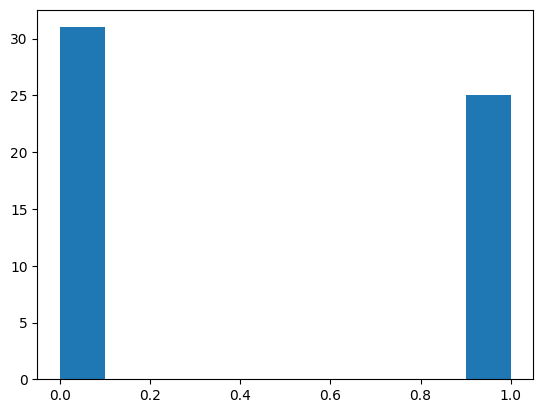

In [58]:
plt.hist(y_true)


(array([ 0.,  0.,  0.,  0.,  0., 56.,  0.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

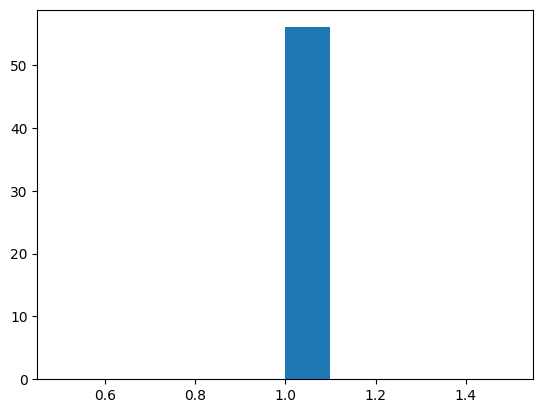

In [59]:
plt.hist(y_pred)

In [60]:
base_cols = ["equity_premium", "abs_ret", "rv20", "rv60", "ma20"]
metrics, y_true, y_pred, dates = modl.tabpfn_cls_oos(
    data = df,
    base_cols = base_cols,
    target_col="state_true",
    
    start_oos="2007-01-01",
    start_date="1850-01-01",
    
    n_lags= 1,
    min_train = 120,
    quiet = False,
    model_name = "TabPFN-CLS-lag",
    baseline_mode = "majority",
    model_params=None,           # e.g. "2.5"
)

2007-01-01 00:00:00
2007-02-01 00:00:00
2007-03-01 00:00:00
2007-04-01 00:00:00
2007-05-01 00:00:00
2007-06-01 00:00:00
2007-07-01 00:00:00
2007-08-01 00:00:00
2007-09-01 00:00:00
2007-10-01 00:00:00
2007-11-01 00:00:00
2007-12-01 00:00:00
2008-01-01 00:00:00
2008-02-01 00:00:00
2008-03-01 00:00:00
2008-04-01 00:00:00
2008-05-01 00:00:00
2008-06-01 00:00:00
2008-07-01 00:00:00
2008-08-01 00:00:00
2008-09-01 00:00:00
2008-10-01 00:00:00
2008-11-01 00:00:00
2008-12-01 00:00:00
2009-01-01 00:00:00
2009-02-01 00:00:00
2009-03-01 00:00:00
2009-04-01 00:00:00
2009-05-01 00:00:00
2009-06-01 00:00:00
2009-07-01 00:00:00
2009-08-01 00:00:00
2009-09-01 00:00:00
2009-10-01 00:00:00
2009-11-01 00:00:00
2009-12-01 00:00:00
2010-01-01 00:00:00
2010-02-01 00:00:00
2010-03-01 00:00:00
2010-04-01 00:00:00
2010-05-01 00:00:00
2010-06-01 00:00:00
2010-07-01 00:00:00
2010-08-01 00:00:00
2010-09-01 00:00:00
2010-10-01 00:00:00
2010-11-01 00:00:00
2010-12-01 00:00:00
2011-01-01 00:00:00
2011-02-01 00:00:00


In [40]:
fit_fn = modl.make_moment_fit_predict_fn(
    feature_cols=["equity_premium", "abs_ret", "rv20", "rv60", "ma20"],   # or a list of your channels
    target_col="state_true",
    seq_len=8,
    epochs=30,
    tune_threshold="youden",           # or "majority" or None
    retrain_every=100,
    batch_size=64,
    use_class_weight=True
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state_true",
    start_oos="2007-01-01",
    start_date="1850-01-01",
    min_train=256,                     # recommend >= seq_len
    model_name="MOMENT-CLS",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
)


ModuleNotFoundError: No module named 'momentfm'

In [ ]:
plt.hist(y_prob)

In [61]:
# Example: XGB/GBM lag classifier
fit_fn = modl.make_tree_ensemble_lag_cls_fit_predict_fn(
    base_cols=["equity_premium", "abs_ret", "rv20", "rv60", "ma20"],
    target_col="state_true",
    n_lags=6,
    class_weight="balanced",
    model_params={"n_estimators": 500, "max_depth": 3},
    return_proba=False,
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state_true",
    start_oos="2007-01-01",
    start_date="1850-01-01",
    min_train=120,
    model_name="XGB-lag6",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
    quiet=False,
)


2007-01-01 00:00:00
2007-02-01 00:00:00
2007-03-01 00:00:00
2007-04-01 00:00:00
2007-05-01 00:00:00
2007-06-01 00:00:00
2007-07-01 00:00:00
2007-08-01 00:00:00
2007-09-01 00:00:00
2007-10-01 00:00:00
2007-11-01 00:00:00
2007-12-01 00:00:00
2008-01-01 00:00:00
2008-02-01 00:00:00
2008-03-01 00:00:00
2008-04-01 00:00:00
2008-05-01 00:00:00
2008-06-01 00:00:00
2008-07-01 00:00:00
2008-08-01 00:00:00
2008-09-01 00:00:00
2008-10-01 00:00:00
2008-11-01 00:00:00
2008-12-01 00:00:00
2009-01-01 00:00:00
2009-02-01 00:00:00
2009-03-01 00:00:00
2009-04-01 00:00:00
2009-05-01 00:00:00
2009-06-01 00:00:00
2009-07-01 00:00:00
2009-08-01 00:00:00
2009-09-01 00:00:00
2009-10-01 00:00:00
2009-11-01 00:00:00
2009-12-01 00:00:00
2010-01-01 00:00:00
2010-02-01 00:00:00
2010-03-01 00:00:00
2010-04-01 00:00:00
2010-05-01 00:00:00
2010-06-01 00:00:00
2010-07-01 00:00:00
2010-08-01 00:00:00
2010-09-01 00:00:00
2010-10-01 00:00:00
2010-11-01 00:00:00
2010-12-01 00:00:00
2011-01-01 00:00:00
2011-02-01 00:00:00


(array([55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

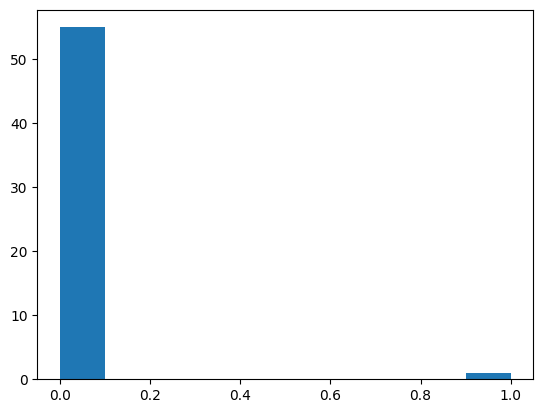

In [42]:
plt.hist(y_pred)

In [62]:
# Example: XGB/GBM lag classifier
fit_fn = modl.make_mlp_lag_cls_fit_predict_fn(
    base_cols=["equity_premium", "abs_ret", "rv20", "rv60", "ma20"],
    target_col="state_true",
    n_lags=6,
    retrain_every=5,
    class_weight= True,
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state_true",
    start_oos="2007-01-01",
    start_date="1850-01-01",
    min_train=120,
    model_name="XGB-lag6",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
    quiet=False,
)


2007-01-01 00:00:00
[MLPCls retrain] epoch 1/5 | loss=0.576418
[MLPCls retrain] epoch 2/5 | loss=0.572152
[MLPCls retrain] epoch 3/5 | loss=0.568218
[MLPCls retrain] epoch 4/5 | loss=0.563478
[MLPCls retrain] epoch 5/5 | loss=0.558352
2007-02-01 00:00:00
2007-03-01 00:00:00
2007-04-01 00:00:00
2007-05-01 00:00:00
[MLPCls retrain] epoch 1/5 | loss=0.570489
[MLPCls retrain] epoch 2/5 | loss=0.567918
[MLPCls retrain] epoch 3/5 | loss=0.565113
[MLPCls retrain] epoch 4/5 | loss=0.562310
[MLPCls retrain] epoch 5/5 | loss=0.558747
2007-06-01 00:00:00
2007-07-01 00:00:00
2007-08-01 00:00:00
2007-09-01 00:00:00
2007-10-01 00:00:00
[MLPCls retrain] epoch 1/5 | loss=0.570810
[MLPCls retrain] epoch 2/5 | loss=0.581213
[MLPCls retrain] epoch 3/5 | loss=0.547162
[MLPCls retrain] epoch 4/5 | loss=0.560751
[MLPCls retrain] epoch 5/5 | loss=0.554754
2007-11-01 00:00:00
2007-12-01 00:00:00
2008-01-01 00:00:00
2008-02-01 00:00:00
2008-03-01 00:00:00
[MLPCls retrain] epoch 1/5 | loss=0.595211
[MLPCls retr

In [63]:
fit_fn = modl.make_chronos_t5_cls_fit_predict_fn(
    feature_col="equity_premium",
    target_col="state_true",
    seq_len=75,                  # 128 is fine too, but 64 often enough for returns
    epochs=5,                    # 5 is fine IF we retrain often (incremental)
    retrain_every=2005,            # <--- Update weights every 25 steps
    lr=1e-3,                     # Slightly higher LR for MLP
    model_id="amazon/chronos-t5-small",
    return_proba=False,           # Better for analyzing performance
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state_true",
    start_oos="2007-01-01",
    # Ensure start_date gives enough history BEFORE start_oos 
    # so the first training set isn't empty.
    start_date="1850-01-01",
    min_train=200,
    model_name="Chronos-T5-Corrected",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
    quiet=False,
)

2007-01-01 00:00:00
[Chronos] Loading amazon/chronos-t5-small on cuda...


config.json: 0.00B [00:00, ?B/s]

c:\Users\kilia\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kilia\.cache\huggingface\hub\models--amazon--chronos-t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
`torch_dtype` is deprecated! Use `dtype` instead!
Xet Storage is enabled for this repo, bu

model.safetensors:   0%|          | 0.00/185M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at amazon/chronos-t5-small and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[Chronos Retrain] Step 1 | Epoch 1/5
[Chronos Retrain] Batch 2 | Loss: 0.6934
[Chronos Retrain] Batch 3 | Loss: 0.7016
[Chronos Retrain] Batch 4 | Loss: 0.6860
[Chronos Retrain] Batch 5 | Loss: 0.6587
[Chronos Retrain] Batch 6 | Loss: 0.6624
[Chronos Retrain] Batch 7 | Loss: 0.6056
[Chronos Retrain] Batch 8 | Loss: 0.7589
[Chronos Retrain] Batch 9 | Loss: 0.6629
[Chronos Retrain] Batch 10 | Loss: 0.6217
[Chronos Retrain] Batch 11 | Loss: 0.7374
[Chronos Retrain] Batch 12 | Loss: 0.5956
[Chronos Retrain] Batch 13 | Loss: 0.5964
[Chronos Retrain] Step 1 | Epoch 2/5
[Chronos Retrain] Batch 2 | Loss: 0.5190
[Chronos Retrain] Batch 3 | Loss: 0.3827
[Chronos Retrain] Batch 4 | Loss: 0.4387
[Chronos Retrain] Batch 5 | Loss: 0.4398
[Chronos Retrain] Batch 6 | Loss: 0.3705
[Chronos Retrain] Batch 7 | Loss: 0.3675
[Chronos Retrain] Batch 8 | Loss: 0.3541
[Chronos Retrain] Batch 9 | Loss: 0.4683
[Chronos Retrain] Batch 10 | Loss: 0.4634
[Chronos Retrain] Batch 11 | Loss: 0.6415
[Chronos Retrain] 

In [20]:
#[Chronos-T5-Corrected] Valid obs=616 | Acc=0.7906 (baseline=0.6104) | BalAcc=0.7983 (baseline=0.5000) | Skill_Acc=0.4625

from importlib import reload
reload(modl)

<module 'source.models_classification' from '/Users/kilianrunnwerth/Masterarbeit/source/models_classification.py'>

In [64]:

fit_fn = modl.make_chronos_forecast_mlp_cls_fn(
    feature_col="equity_premium",
    target_col="state_true",
    seq_len=100,                  # 128 is fine too, but 64 often enough for returns
    epochs = 5 ,                    # 5 is fine IF we retrain often (incremental)
    retrain_every=500,            # <--- Update weights every 25 steps
    lr=1e-3,                     # Slightly higher LR for MLP
    model_id = "amazon/chronos-bolt-tiny",    
    return_proba=False,           # Better for analyzing performance
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state_true",
    start_oos="2007-01-01",
    # Ensure start_date gives enough history BEFORE start_oos 
    # so the first training set isn't empty.
    start_date="1850-01-01",
    min_train=200,
    model_name="Chronos-T5-Corrected",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
    quiet=False,
)

2007-01-01 00:00:00
[Chronos-MLP] Loading amazon/chronos-bolt-tiny on cuda...


config.json: 0.00B [00:00, ?B/s]

c:\Users\kilia\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kilia\.cache\huggingface\hub\models--amazon--chronos-bolt-tiny. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
`torch_dtype` is deprecated! Use `dtype` instead!
Xet Storage is enabled for this repo, b

model.safetensors:   0%|          | 0.00/34.6M [00:00<?, ?B/s]

2007-02-01 00:00:00
2007-03-01 00:00:00
2007-04-01 00:00:00
2007-05-01 00:00:00
2007-06-01 00:00:00
2007-07-01 00:00:00
2007-08-01 00:00:00
2007-09-01 00:00:00
2007-10-01 00:00:00
2007-11-01 00:00:00
2007-12-01 00:00:00
2008-01-01 00:00:00
2008-02-01 00:00:00
2008-03-01 00:00:00
2008-04-01 00:00:00
2008-05-01 00:00:00
2008-06-01 00:00:00
2008-07-01 00:00:00
2008-08-01 00:00:00
2008-09-01 00:00:00
2008-10-01 00:00:00
2008-11-01 00:00:00
2008-12-01 00:00:00
2009-01-01 00:00:00
2009-02-01 00:00:00
2009-03-01 00:00:00
2009-04-01 00:00:00
2009-05-01 00:00:00
2009-06-01 00:00:00
2009-07-01 00:00:00
2009-08-01 00:00:00
2009-09-01 00:00:00
2009-10-01 00:00:00
2009-11-01 00:00:00
2009-12-01 00:00:00
2010-01-01 00:00:00
2010-02-01 00:00:00
2010-03-01 00:00:00
2010-04-01 00:00:00
2010-05-01 00:00:00
2010-06-01 00:00:00
2010-07-01 00:00:00
2010-08-01 00:00:00
2010-09-01 00:00:00
2010-10-01 00:00:00
2010-11-01 00:00:00
2010-12-01 00:00:00
2011-01-01 00:00:00
2011-02-01 00:00:00
2011-03-01 00:00:00


(array([17.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 39.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

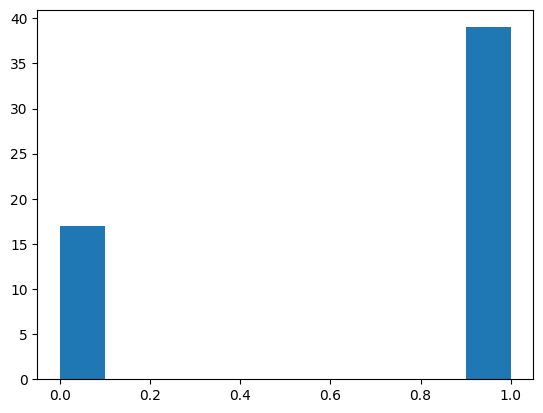

In [65]:
plt.hist(y_pred)